# University staff

## [Download worked project](../../_static/generated/university-staff-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/university-staff)

You will work on the dataset of _University of Trento staff_, modified so not to contain names or surnames.

Data provider: [University of Trento](https://dati.trentino.it/dataset/personale-accademico-e-tecnico-amministrativo-dell-universita-di-trento)


## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
university-staff-prj
    university-staff.ipynb
    university-staff-sol.ipynb
    2019-06-30-persone-en-stripped.json
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `university-staff.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## load_data

A function `load_data` is given to load the dataset [2019-06-30-persone-en-stripped.json](2019-06-30-persone-en-stripped.json) (you don’t need to implement it):

In [1]:
import json

def load_data():
    with open('2019-06-30-persone-en-stripped.json', encoding='utf-8') as json_file:
        data = json.load(json_file)
        return data

unitn = load_data()

<div class="alert alert-warning">

**IMPORTANT**: look at the dataset !

Here we show only first 2 rows, but to get a clear picture of the dataset you should explore it further.

</div>


The dataset contains a list of employees, each of whom may have one or more positions, in one or more university units. Each unit is identified by a code like ``STO0000435``:

In [2]:
unitn[:2]

[{'givenName': 'NAME-1',
  'phone': ['0461 283752'],
  'identifier': 'eb9139509dc40d199b6864399b7e805c',
  'familyName': 'SURNAME-1',
  'positions': [{'unitIdentifier': 'STO0008929',
    'role': 'Staff',
    'unitName': 'Student Support Service: Economics, Law and International Studies'}]},
 {'givenName': 'NAME-2',
  'phone': ['0461 281521'],
  'identifier': 'b6292ffe77167b31e856d2984544e45b',
  'familyName': 'SURNAME-2',
  'positions': [{'unitIdentifier': 'STO0000435',
    'role': 'Associate professor',
    'unitName': 'Doctoral programme – Physics'},
   {'unitIdentifier': 'STO0000435',
    'role': 'Deputy coordinator',
    'unitName': 'Doctoral programme – Physics'},
   {'unitIdentifier': 'STO0008627',
    'role': 'Associate professor',
    'unitName': 'Department of Physics'}]}]

Department names can be very long, so when you need to display them you can use the function this `abbreviate`. 

**NOTE**: function is already fully implemented, **do not** modify it.

In [3]:
def abbreviate(unitName):
    
    abbreviations = {
         
        "Department of Psychology and Cognitive Science": "COGSCI",    
        "Center for Mind/Brain Sciences - CIMeC":"CIMeC",
        "Department of Civil, Environmental and Mechanical Engineering":"DICAM",    
        "Centre Agriculture Food Environment - C3A":"C3A",
        "School of International Studies - SIS":"SIS",
        "Department of Sociology and social research": "Sociology",
        "Faculty of Law": "Law",
        "Department of Economics and Management": "Economics",
        "Department of Information Engineering and Computer Science":"DISI",
        "Department of Cellular, Computational and Integrative Biology - CIBIO":"CIBIO",
        "Department of Industrial Engineering":"DII"
    }
    if unitName in abbreviations:
        return abbreviations[unitName]
    else:
        return unitName.replace("Department of ", "")


**Example:**

In [4]:
abbreviate("Department of Information Engineering and Computer Science")

'DISI'

## 1. calc_uid_to_abbr

✪ It will be useful having a map from department ids to their abbreviations, if they are actually present, otherwise to their original name. To implement this, you can use the previously defined function `abbreviate`.

```python
{
 .
 .
 'STO0008629': 'DISI',
 'STO0008630': 'Sociology',
 'STO0008631': 'COGSCI',
 .
 .
 'STO0012897': 'Institutional Relations and Strategic Documents',
 .
 .
}
```



In [5]:
def calc_uid_to_abbr(db):
    #jupman-raise
    ret = {}
    for person in db:
        for position in person['positions']:
            uid = position['unitIdentifier']        
            ret[uid] = abbreviate(position['unitName'])
    return ret
    #/jupman-raise

#calc_uid_to_abbr(unitn)
print(calc_uid_to_abbr(unitn)['STO0008629'])
print(calc_uid_to_abbr(unitn)['STO0012897'])

DISI
Institutional Relations and Strategic Documents


## 2.1 calc_prof_roles

✪✪ For each department, we want to see how many professor roles are covered, sorting them from greatest to lowest. In returned list we will only put the 10 department with most roles.

* **NOTE 1**: we are interested in _roles_ covered. Don't care if actual people might be less (one person can cover more professor roles within the same unit)
* **NOTE 2**: there are several professor roles. Please avoid listing all roles in the code ("Senior Professor', "Visiting Professor", ....), and prefer using some smarter way to match them. 


In [6]:
def calc_prof_roles(db):
    #jupman-raise
    hist = {}
    uid_to_abbr = calc_uid_to_abbr(db)
    
    for person in db:
        for position in person['positions']:
            
            role = position['role']
            uid = position['unitIdentifier']
            if 'professor'.lower() in role.lower():                            
                if uid in hist:
                    hist[uid] += 1
                else:
                    hist[uid] = 1
    
    ret = [(uid_to_abbr[x[0]],x[1]) for x in hist.items()]
    ret.sort(key=lambda c: c[1], reverse=True)    
    return ret[:10]
    #/jupman-raise
    
#calc_prof_roles(unitn)

In [7]:
# EXPECTED RESULT
calc_prof_roles(unitn)

[('Humanities', 92),
 ('DICAM', 85),
 ('Law', 84),
 ('Economics', 83),
 ('Sociology', 66),
 ('COGSCI', 61),
 ('Physics', 60),
 ('DISI', 55),
 ('DII', 49),
 ('Mathematics', 47)]

## 2.2 plot_profs

✪ Write a funciton to plot a bar chart of data calculated above

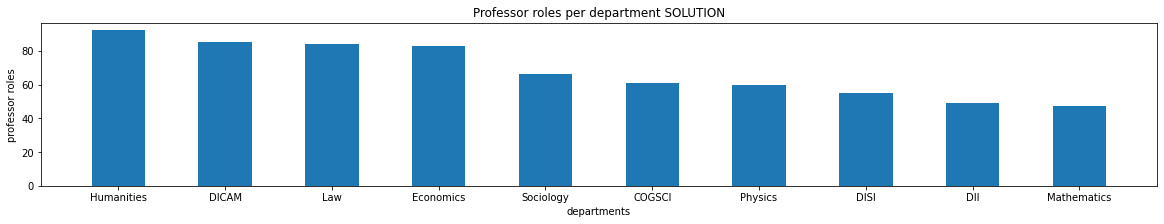

In [8]:
#jupman-purge-output
%matplotlib inline
import matplotlib.pyplot as plt


def plot_profs(db):
    #jupman-raise
        
    prof_roles = calc_prof_roles(db)
        
    xs = list(range(len(prof_roles)))
    xticks = [p[0] for p in prof_roles]
    ys = [p[1] for p in prof_roles]
    
    fig = plt.figure(figsize=(20,3))

    plt.bar(xs, ys, 0.5, align='center')

    plt.title("Professor roles per department SOLUTION")
    plt.xticks(xs, xticks)

    plt.xlabel('departments')
    plt.ylabel('professor roles')

    #jupman-purge
    plt.savefig('expected-profs.png')
    #/jupman-purge
    
    plt.show()    
    #/jupman-raise

plot_profs(unitn)

## 3.1 calc_roles

✪✪ We want to calculate how many roles are covered for each department.

You will group roles by these macro groups (some already exist, some are new):

- Professor : "Senior Professor', "Visiting Professor", ...
- Research : "Senior researcher", "Research collaborator", ...
- Teaching : "Teaching assistant", "Teaching fellow", ...
- Guest : "Guest", ...

and discard all the others (there are many, like "Rector", "Head", etc ..)

**NOTE**: Please avoid listing all roles in the code ("Senior researcher", "Research collaborator", ...), and prefer using some smarter way to match them. 


In [9]:

def calc_roles(db):
    #jupman-raise
    ret = {}
    for person in db:
        for position in person['positions']:
            uid = position['unitIdentifier']
            role = position['role']
            grouped_role = None
            if "professor" in role.lower():
                grouped_role = 'Professor'
            elif "research" in role.lower():
                grouped_role = 'Research'
            elif "teaching" in role.lower():
                grouped_role = 'Teaching'
            elif "guest" in role.lower():
                grouped_role = 'Guest'

            if grouped_role:
                if uid in ret:
                    if grouped_role in ret[uid]:
                        ret[uid][grouped_role] += 1
                    else:
                        ret[uid][grouped_role] = 1
                else:
                    diz = {}
                    diz[grouped_role] = 1                    
                    ret[uid] = diz
        
    return ret
    #/jupman-raise

#print(calc_roles(unitn)['STO0000001'])
#print(calc_roles(unitn)['STO0000006'])
#print(calc_roles(unitn)['STO0000012'])
#print(calc_roles(unitn)['STO0008629'])

EXPECTED RESULT - Showing just first ones ...

```python
>>> calc_roles(unitn)

{
 'STO0000001': {'Teaching': 9, 'Research': 3, 'Professor': 12},
 'STO0000006': {'Professor': 1},
 'STO0000012': {'Guest': 3},
 'STO0008629': {'Teaching': 94, 'Research': 71, 'Professor': 55, 'Guest': 38}
 .
 .
 .
}
```

## 3.2 plot_roles

✪✪ Implement a function `plot_roles` that given, the abbreviations (or long names) of some departments, plots pie charts of their grouped role distribution, all in one row.

* **NOTE 1**: different plots MUST show equal groups with equal colors
* **NOTE 2**: always show all the 4 macro groups defined before, even if they have zero frequency


* For on example on how to plot the pie charts, [see this](https://sciprog.davidleoni.it/visualization/visualization-sol.html#Pie-chart)
* For on example on plotting side by side, [see this](https://sciprog.davidleoni.it/visualization/visualization-sol.html#Showing-plots-side-by-side)

![expected-roles.png](expected-roles.png)

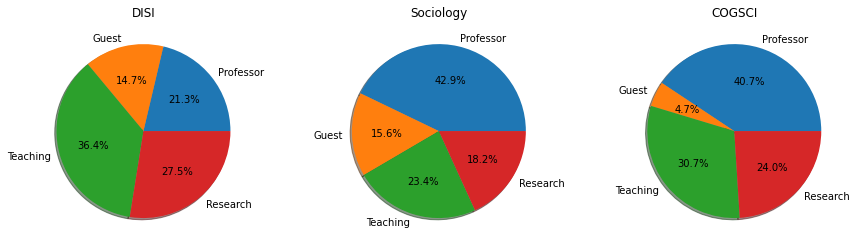

In [10]:
#jupman-purge-output
%matplotlib inline
import matplotlib.pyplot as plt

def plot_roles(db, abbrs):
    #jupman-raise    
    fig = plt.figure(figsize=(15,4))
    uid_to_abbr = calc_uid_to_abbr(db)
    
    for i in range(len(abbrs)):
            
            abbr = abbrs[i]
            roles = calc_roles(db)
            
            uid = None

            for key in uid_to_abbr:
                if uid_to_abbr[key] == abbr:
                    uid = key

            labels = ['Professor', 'Guest', 'Teaching', 'Research']
            fracs = []
            for role in labels:
                if role in roles[uid]:
                    fracs.append(roles[uid][role])
                else:
                    fracs.append(0)

            plt.subplot(1,            # rows
                        len(abbrs),   # columns
                        i+1)          # plotting in first cell                
            plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
            plt.title(abbr )
            #jupman-purge
            plt.savefig('expected-roles.png')
            #/jupman-purge
    #/jupman-raise
    
    
plot_roles(unitn, ['DISI','Sociology', 'COGSCI'])

## 4.1 calc_shared

✪✪✪ We want to calculate the 10 _department pairs_ that have the greatest number of people working in _both_ departments (regardless of role), sorted in decreasing order.

For example,  'CIMeC' and 'COGSCI' have 23 people working in both departments, meaning each of these 23 people has at least a position at CIMeC and at least a position at COGSCI.

**NOTE**: in this case we are looking at number of actual people,  _not_ number of roles covered

* we do not want to consider Doctoral programmes
* we do not want to consider 'University of Trento' department (STO0000001)
* if  your calculations display with swapped names  (  ('COGSCI', 'CIMeC', 23) instead of ('CIMeC', 'COGSCI', 23) ) it is not important, as long as they display just once per pair.


To implement this, we provide a sketch:

* build a dict which assigns unit codes to a `set` of _identifiers_ of people that work for that unit
* to add elements to a set, use `.add` method
* to find common employees between two units, use set `.intersection` method (NOTE: it generates a _new_ set)
* to check for all possibile unit couples, you will need a double `for` on a list of departments. To avoid double checking pairs ( so not have both ('CIMeC', 'COGSCI', 23) and ('COGSCI', 'CIMeC', 23) in output), you can think like you are visiting the lower of a matrix (for the sake of the example here we put only 4 departments with random numbers). 

```
           0      1      2      3
         DISI, COGSCI, CIMeC, DICAM
0 DISI    --     --     --    --
1 COGSCI  313    --     --    -- 
2 CIMeC   231    23     --    --
3 DICAM   12     13     123   --
```


In [11]:

def calc_shared(db):
    #jupman-raise
    ret = {}
    uid_to_people = {}
            
    uid_to_abbr = calc_uid_to_abbr(db)

    for person in db:

        for position in person['positions']:
            uid = position['unitIdentifier']        
            if not uid in uid_to_people:
                uid_to_people[uid] = set()            
            uid_to_people[uid].add(person['identifier'])

    uids = list(uid_to_people)

    ret = []
    for x in range(len(uids)):
        uidx = uids[x]
        for y in range(x):
            uidy = uids[y]
            num = len(uid_to_people[uidx].intersection(uid_to_people[uidy]))
            if (num > 0) \
              and ("Doctoral programme" not in uid_to_abbr[uidx]) \
              and ("Doctoral programme" not in uid_to_abbr[uidy]) \
              and (uidx != 'STO0000001') \
              and (uidy != 'STO0000001'):
                ret.append( (uid_to_abbr[uidx], uid_to_abbr[uidy],num) )

    ret.sort(key=lambda c: c[2], reverse=True)
    ret = ret[:10]
    return ret
    #/jupman-raise
    
#calc_shared(unitn)


In [12]:
# EXPECTED RESULT
calc_shared(unitn)

[('COGSCI', 'CIMeC', 23),
 ('DICAM', 'C3A', 14),
 ('DISI', 'Economics', 7),
 ('SIS', 'Sociology', 7),
 ('SIS', 'Law', 6),
 ('Economics', 'Sociology', 5),
 ('SIS', 'Humanities', 5),
 ('Economics', 'Law', 4),
 ('DII', 'DISI', 4),
 ('CIBIO', 'C3A', 4)]

## 4.2 plot_shared

✪ Plot the above in a bar chart, where on the x axis there are the department pairs and on the y the number of people in common.

![expected-unitn-shared.png](expected-shared.png)

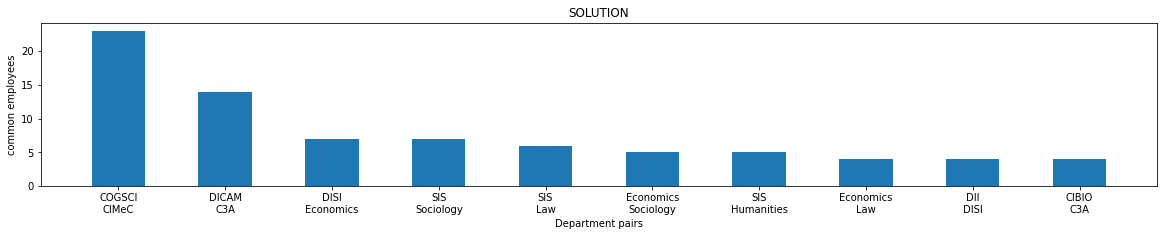

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_shared(db):
    #jupman-raise

    uid_to_abbr = calc_uid_to_abbr(db)       

    shared = calc_shared(db)
    xs = range(len(shared))
    
    xticks = [x[0] + "\n" + x[1] for x in shared]

    ys = [x[2] for x in shared]
    
    fig = plt.figure(figsize=(20,3))

    plt.bar(xs, ys, 0.5, align='center')

    plt.title("SOLUTION")
    plt.xticks(xs, xticks)

    plt.xlabel('Department pairs')
    plt.ylabel('common employees')

    #jupman-purge
    plt.savefig('expected-shared.png')
    #/jupman-purge
    
    plt.show()
    #/jupman-raise

plot_shared(unitn)